In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./data/regression/support_vector_regression/Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [5]:
y = y.reshape(len(y), 1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [7]:
X = sc_X.fit_transform(X)

In [8]:
y = sc_y.fit_transform(y)

In [9]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

C:\Users\paulw\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [12]:
# prediction of salary if position level is 6.5
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

In [13]:
# transformed x value if position level is 6.5
sc_X.transform([[6.5]])

array([[0.34815531]])

In [14]:
# predicted transformed y value if position level is 6.5
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

Text(0, 0.5, 'Salary')

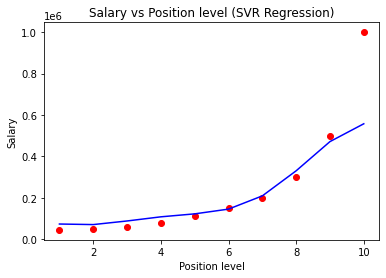

In [28]:
# plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.scatter(dataset.iloc[:,1:-1].values, dataset.iloc[:,-1].values, color="red")
plt.plot(dataset.iloc[:,1:-1].values, sc_y.inverse_transform(regressor.predict(X)), color="blue")
plt.title("Salary vs Position level (SVR Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

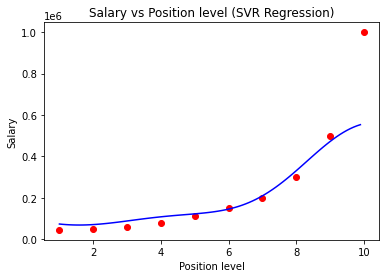

In [31]:
X_grid = np.arange(min(dataset.iloc[:,1:-1].values), max(dataset.iloc[:,1:-1].values), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(dataset.iloc[:,1:-1].values, dataset.iloc[:,-1].values, color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color="blue")
plt.title("Salary vs Position level (SVR Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")